<a id="goal"></a>
## Project description & Goal

<font color="blue">
 
We've received an analytical task from an international online store. Our predecessor failed to complete it: they launched an A/B test and then quit. They left only the technical specifications and the test results. <br>
The task is to check whether it was carried out correctly, and analyze the results.

## Step 1. Open the data file and study the general information

In [1]:
import pandas as pd
import plotly.express as px
from plotly import graph_objects as go
from scipy import stats
import math

In [2]:
calendar

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


In [3]:
users.head(5)

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     58703 non-null  object
 1   first_date  58703 non-null  object
 2   region      58703 non-null  object
 3   device      58703 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [5]:
events.head(5)

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


In [6]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     423761 non-null  object 
 1   event_dt    423761 non-null  object 
 2   event_name  423761 non-null  object 
 3   details     60314 non-null   float64
dtypes: float64(1), object(3)
memory usage: 12.9+ MB


In [7]:
test.head(5)

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB


## Conclusion

<font color="blue">
    
We have 4 datasets:
  - calendar: the calendar of marketing events for 2020, with 14 rows and 4 columns.
  - users: all users who signed up in the online store from December 7 to 21, 2020. with 58703 rows and 4 columns.
  - events: all events of the new users within the period from December 7, 2020 through January 1, 2021. with 423761 rows and 4 columns.
  - test:  table containing test participants, with 14525 rows and 3 columns.<br>

there are no missing values in datasets, just in column `detail` in `events` table.    

## Step 2. Data preprocessing

- **Processing missing values**

In [9]:
events.details=events.details.fillna(0)

In [10]:
events.query('details!=0')['event_name'].value_counts()

purchase    60314
Name: event_name, dtype: int64

 - **Data type replacement**

In [11]:
calendar.start_dt=pd.to_datetime(calendar.start_dt)
calendar.finish_dt=pd.to_datetime(calendar.finish_dt)

In [12]:
users.first_date=pd.to_datetime(users.first_date)

In [13]:
events.event_dt=pd.to_datetime(events.event_dt)
events['event_dt']=events['event_dt'].dt.date
events.event_dt=pd.to_datetime(events.event_dt)

 - **Processing duplicates**

In [14]:
calendar.duplicated().sum()

0

In [15]:
users.duplicated().sum()

0

In [16]:
events.duplicated().sum()

2

In [17]:
events.drop_duplicates(inplace=True)

In [18]:
test.duplicated().sum()

0

## Conclusion

<font color="blue">
    
missing values in `detail` are not actually missing value, they belong to events except purchase. So, we can fill them with 0.<br>   Changes required in data types were done and duplicated were checked and dropped.    

## Step 3: Exploratory data analysis

<a id="description"></a>
- **Cheking the validity of the technical description**

In [19]:
df=events.merge(test, on='user_id', how='inner').merge(users, on='user_id')

In [20]:
df.head(2)

,user_id,event_dt,event_name,details,group,ab_test,first_date,region,device
0,96F27A054B191457,2020-12-07,purchase,4.99,B,interface_eu_test,2020-12-07,EU,iPhone
1,96F27A054B191457,2020-12-08,purchase,4.99,B,interface_eu_test,2020-12-07,EU,iPhone


In [21]:
df.event_dt.min()

Timestamp('2020-12-07 00:00:00')

In [22]:
df.event_dt.max()

Timestamp('2020-12-30 00:00:00')

In [23]:
df[df['first_date']>df['event_dt']]

,user_id,event_dt,event_name,details,group,ab_test,first_date,region,device


In [24]:
df.ab_test.value_counts()

interface_eu_test          78929
recommender_system_test    23909
Name: ab_test, dtype: int64

In [25]:
df1=df.query('ab_test=="recommender_system_test"')
df2=df.query('ab_test=="interface_eu_test"')

In [26]:
df1.group.value_counts()

A    18627
B     5282
Name: group, dtype: int64

In [27]:
df2.group.value_counts()

A    40078
B    38851
Name: group, dtype: int64

In [28]:
df1.region.value_counts()

EU           22674
N.America      804
APAC           225
CIS            206
Name: region, dtype: int64

In [29]:
df2.region.value_counts()

EU    78929
Name: region, dtype: int64

In [30]:
print("users in recommender_system_test: {}".format(df1.user_id.nunique()))
print("users in interface_eu_test: {}".format(df2.user_id.nunique()))

users in recommender_system_test: 3675
users in interface_eu_test: 10850


In [31]:
df.region.unique()

array(['EU', 'N.America', 'CIS', 'APAC'], dtype=object)

In [32]:
df1.query('region=="EU"').user_id.nunique()/len(users.query('region=="EU"'))

0.08021476633791133

In [33]:
df2.query('region=="EU"').user_id.nunique()/len(users.query('region=="EU"'))

0.2500230435984883

<font color="blue">
    
We split the data into 2 tests: `recommender_system_test` and `interface_eu_test`and checked the technical description for each of them.<br>
    
  -  The time is correct.
  - `recommender_system_test`: there are 3675 participants from all regions and 8% of EU.
  - `interface_eu_test`: there are 10850 participants from EU and 25% of them.
    
The description matches `interface_eu_test` and we would check the results for it.
    

<a id="funnel"></a>
- **Study conversion at different funnel stages**

In [34]:
data=df.query('ab_test=="interface_eu_test"')
len(data)

78929

In [35]:
data.user_id.nunique()

10850

In [36]:
funnel=data.groupby('event_name').agg({'user_id':'nunique'}).\
reindex(['login', 'product_page',"product_cart" ,'purchase']).reset_index().\
rename(columns={'event_name' : 'stage', 'user_id':'users'})
funnel

,stage,users
0,login,10849
1,product_page,7166
2,product_cart,3568
3,purchase,3713


In [37]:
funnel['conversion']=funnel['users']/data.user_id.nunique()

In [38]:
funnel['conversion to next stage']=funnel['users']/funnel['users'].shift(+1)

In [39]:
funnel['perc_churn']=funnel['users'].pct_change()

In [40]:
funnel

,stage,users,conversion,conversion to next stage,perc_churn
0,login,10849,0.999908,NaN,NaN
1,product_page,7166,0.660461,0.660522,-0.339478
2,product_cart,3568,0.328848,0.497907,-0.502093
3,purchase,3713,0.342212,1.040639,0.040639


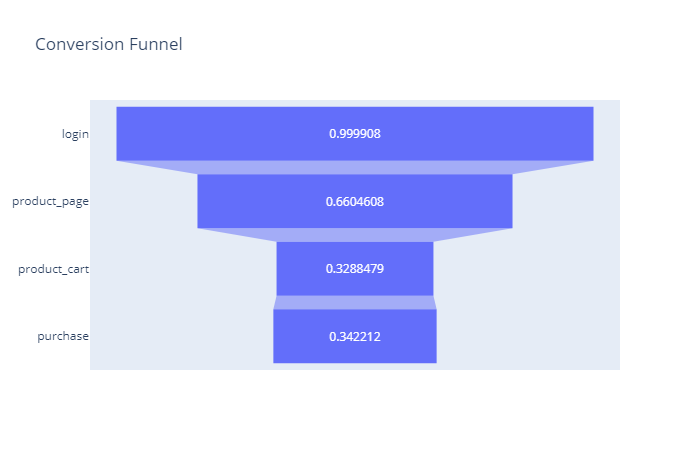

In [41]:
fig=go.Figure(go.Funnel(x=funnel.conversion, y=funnel.stage))
fig.update_layout( title="Conversion Funnel")
fig.show("png")

<font color="blue">
    
At stage product_cart we lose the most users(49%). <br>
66% of users who login also go to the product page.  <br>
34% of users make the entire journey from their first event to payment. 

<a id="conditions"></a>
- **Is the number of events per user distributed equally in the samples?**

In [42]:
data.group.value_counts()

A    40078
B    38851
Name: group, dtype: int64

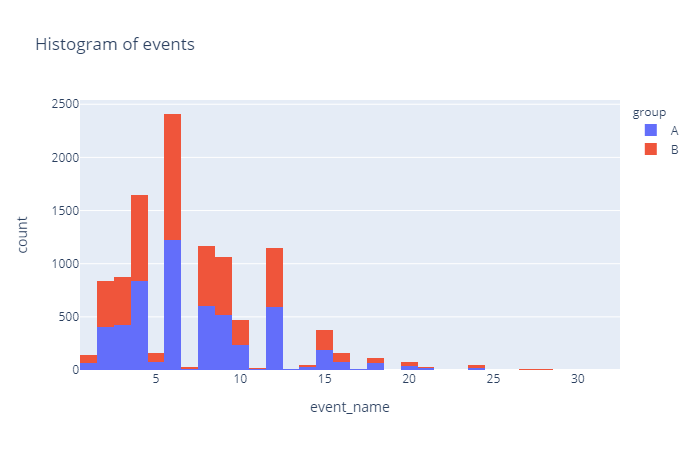

In [43]:
fig= px.histogram(data.groupby('user_id').agg({'event_name':'count','group':'first'}).\
reset_index(), color='group',x="event_name", title='Histogram of events')
fig.show("png")

 - **Are there users who are present in both samples?**

In [44]:
data.groupby('user_id').agg({'group':'nunique'}).reset_index().query('group==2')

,user_id,group


 - **How is the number of events distributed among days?**

In [45]:
data.groupby('event_dt').agg({'event_name':'count'})

,event_name
event_dt,
2020-12-07,2068
2020-12-08,2311
2020-12-09,2333
2020-12-10,2551
2020-12-11,2603
2020-12-12,3482
2020-12-13,3974
2020-12-14,4783
2020-12-15,4333


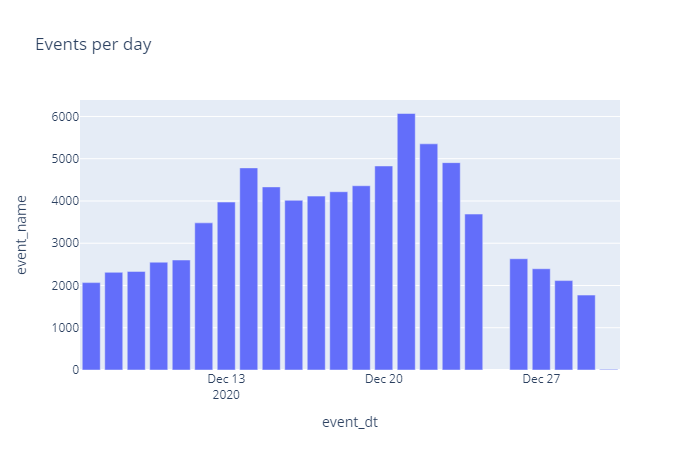

In [46]:
fig= px.bar(data.groupby('event_dt').agg({'event_name':'count'}).\
reset_index(),x="event_dt", y='event_name', title='Events per day')
fig.show("png")

<font color="blue">
    
We see there is a problem with the system on 25.Dec. It could be due to Christmas&New Year Promo, bacause the prome was started on 25.Dec. 	

 - **Are there any peculiarities in the data that you have to take into account before starting the A/B test?**

In [47]:
calendar.iloc[:1]

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03


In [48]:
data=data.query('event_dt<"2020-12-25"')

<font color="blue">
Since Christmas promo is applied from 25.Dec to 3.Jan and it may affect the analysis, it is better to take this time out of the analysis.

## Conclusion

<font color="blue">

**Check the technical description** <br>
 We split the data into 2 tests: 
  - `recommender_system_test` 
  - `interface_eu_test`<br>
    
and checked the technical description for each of them.<br>
The description matched `interface_eu_test` and we would check the results for it.
    
**Check other A/B test conditions**  
The number of events per user are distributed equally in the samples.<br>
There aren't users who are present in both samples.   
    
Since Christmas promo is being held from 25.Dec to 3.Jan and it may affect the analysis, it is better to take this time out of the analysis.

**Study the funnel<br>**
At stage product_cart we lose the most users(49%). <br>
66% of users who login also go to the product page.  <br>
34% of users make the entire journey from their first event to payment.     

<a id="results"></a>
## Step 4: Evaluate the A/B test results

- **What can you say about the A/B test results?**

In [49]:
data.head(1)

,user_id,event_dt,event_name,details,group,ab_test,first_date,region,device
0,96F27A054B191457,2020-12-07,purchase,4.99,B,interface_eu_test,2020-12-07,EU,iPhone


In [50]:
pivot = data.pivot_table(index='event_name', values='user_id', columns='group', aggfunc='nunique').\
reindex(['login', 'product_page',"product_cart" ,'purchase']).reset_index().\
rename(columns={'event_name':'stage'})
pivot

group,stage,A,B
0,login,5466,5383
1,product_page,3639,3527
2,product_cart,1756,1812
3,purchase,1931,1782


In [51]:
pivot['conversion A']=pivot['A']/data.query('group=="A"').user_id.nunique()
pivot['conversion B']=pivot['B']/data.query('group=="B"').user_id.nunique()

In [52]:
pivot

group,stage,A,B,conversion A,conversion B
0,login,5466,5383,0.999817,1.000000
1,product_page,3639,3527,0.665630,0.655211
2,product_cart,1756,1812,0.321200,0.336615
3,purchase,1931,1782,0.353210,0.331042


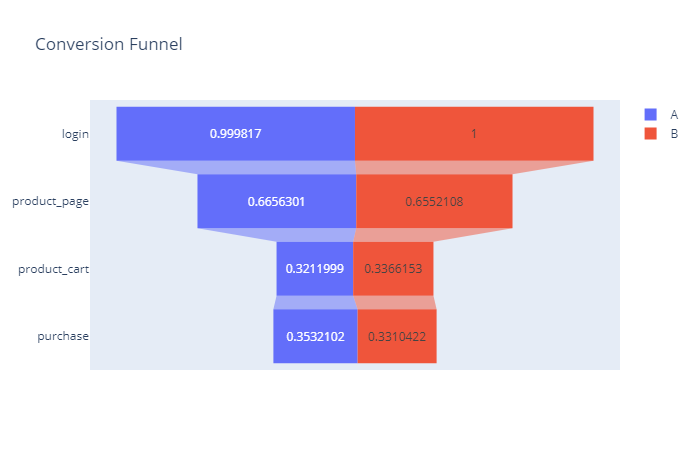

In [53]:
fig = go.Figure()
fig.add_trace(go.Funnel(x=pivot['conversion A'], y=pivot.stage, name = 'A'))
fig.add_trace(go.Funnel(x=pivot['conversion B'], y=pivot.stage, name = 'B'))
fig.update_layout( title="Conversion Funnel")
fig.show("png")

<font color="blue">
    
The expected result was at each stage of the funnel, that there will be at least a 10% increase, but we see only a decrease of about 1 to 2 percent!  
    

 - **Use a z-test to check the statistical difference between the proportions.**

In [54]:
def check_hypothesis(group1,group2, event, alpha=0.05):
    #let's start with successes, using 
    successes1=pivot[pivot.stage==event][group1].iloc[0]
    successes2=pivot[pivot.stage==event][group2].iloc[0]
    
    #for trials we can go back to original df or used a pre-aggregated data
    trials1=data[data.group==group1]['user_id'].nunique()
    trials2=data[data.group==group2]['user_id'].nunique()
    
    #proportion for success in the first group
    p1 = successes1/trials1

   #proportion for success in the second group
    p2 = successes2/trials2

    # proportion in a combined dataset
    p_combined = (successes1 + successes2) / (trials1 + trials2)

  
    difference = p1 - p2
    
    
    z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2))

  
    distr = stats.norm(0, 1) 


    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-value: ', p_value)

    if (p_value < alpha):
        print("Reject H0 for", event, 'and groups',group1, group2)
    else:
        print("Fail to Reject H0 for", event,'and groups',group1, group2)  

In [55]:
pivot

group,stage,A,B,conversion A,conversion B
0,login,5466,5383,0.999817,1.000000
1,product_page,3639,3527,0.665630,0.655211
2,product_cart,1756,1812,0.321200,0.336615
3,purchase,1931,1782,0.353210,0.331042


<font color ='blue'>

A/B Test: Hypotheses for difference between samples A and B
    
H0: There isn't a statistically significant difference between samples A and B for login.<br>
H1: There is a statistically significant difference between samples A and B for login.

H0: There isn't a statistically significant difference between samples A and B for for product_cart.<br>
H1: There is a statistically significant difference between samples A and B for for product_cart.

H0: There isn't a statistically significant difference between samples A and B for product_page.<br>
H1: There is a statistically significant difference between samples A and B for product_page.

H0: There isn't a statistically significant difference between samples A and B for purchase.<br>
H1: There is a statistically significant difference between samples A and B for purchase.


In [56]:
for i in pivot.stage.unique():
    check_hypothesis('A', 'B', i, alpha=0.05)

p-value:  0.32103485047255065
Fail to Reject H0 for login and groups A B
p-value:  0.2518419682737163
Fail to Reject H0 for product_page and groups A B
p-value:  0.08746918913258162
Fail to Reject H0 for product_cart and groups A B
p-value:  0.014959088807690257
Reject H0 for purchase and groups A B


<font color ='blue'>
    
H0 would be rejected just at `purchase` stage. There is just a significant difference at `purcghase` stage between samples group A and B. <br>In other stages there aren't a significant difference between samples group A and B.   

<font color ='blue'>
    
We made 4 Hypotheses for the A/B tests. We could correct the significance level by Bonferroni procedure and the significance level of each test will be 0.05 / 4 = 0.0125. We run through the previous steps again. 

In [57]:
# alpha=0.05/4=0.0125

In [58]:
for i in pivot.stage.unique():
    check_hypothesis('A', 'B', i, alpha=0.0125)

p-value:  0.32103485047255065
Fail to Reject H0 for login and groups A B
p-value:  0.2518419682737163
Fail to Reject H0 for product_page and groups A B
p-value:  0.08746918913258162
Fail to Reject H0 for product_cart and groups A B
p-value:  0.014959088807690257
Fail to Reject H0 for purchase and groups A B


<font color ='blue'>
H0 wouldn't be rejected at any stage. There aren't statistically significant difference between samples group A and B.  

## Conclosion

<font color ='blue'>

There aren't statistically significant difference between samples A and B at any stages after correcting the alpha.    
    

## step 5: Overall Conclusion

<font color="blue">
    
### [Goal](#goal)
    
We've received an analytical task from an international online store. Our predecessor failed to complete it: they launched an A/B test and then quit. They left only the technical specifications and the test results.
The task is to check whether it was carried out correctly, and analyze the results.
    
### [Study the event funnel](#funnel)
  - At stage product_cart we lose the most users(49%).
  - 66% of users who login also go to the product page.
  - 34% of users make the entire journey from their first event to payment. 
    
### [Check the technical description](#description)
We split the data into 2 tests:

  - recommender_system_test
  - interface_eu_test
    
and checked the technical description for each of them.<br>
The description matched `interface_eu_test` and we would check the results for it.

### [Check other A/B test conditions](#conditions)
    
 - The number of events per user are distributed equally in the samples.<br>
 - There aren't users who are present in both samples.<br>
 - Since Christmas promo is being held from 25.Dec to 3.Jan and it may affect the analysis, it is better to take this time out of the analysis.


### [Study the results of the experiment](#results)
    
  - The expected result at each stage of the funnel, was that there will be at least a 10% increase, but we see only a decrease of about 1 to 2 percent.    
  - There is just a significant difference at purcghase stage between samples group A and B.  
  - There aren't statistically significant difference between samples group A and B at any stages  after correcting the alpha.
    
### Final Conclusion and Suggestions  
    
Changing the payment funnel didn't cause a significant difference in conversion between the test and control group. Therefore, the test is not successful and changing the payment funnel is not effective in the conversion rate. So it is not recommended. 